# Aula8_independencia_ANOVA_tukey

Os procedimentos de ANÁLISE DE VARIÂNCIA (ANOVA) foram desenvolvidos por R.A. Fisher no começo da década de  1920 para testar a hipótese nula de a média de resultados entre duas ou mais médias de amostras/grupos/experimentos serem iguais. Com análise de variância, os horizontes estatísticos são ampliados, pois se pode testar sobre um número mais elevado de populações (Kirk 1998).

#### 1. Estrutura do teste de hipótese 

Hipótese nula: IGUALDADE ENTRE OS GRUPOS.

H0: média1 = média2 = ... = médiap

Hipótese nula: DIFERENÇA ENTRE OS GRUPOS.

H1: algumas das p médias apresenta diferença.

Se a hipótese nula é rejeitada, passa-se a saber que ao menos duas das médias populacionais presentes no teste não são iguais. 

Rejeição de uma hipótese nula não significa que todas as médias entre as populações são diferentes -- apenas que duas médias demonstraram diferença significativa.

Se a hipótese nula não for rejeitada, ela permanece sustentável.


#### 2. ANOVA em aplicação  

Carregando os dados:

In [2]:
library(tidyverse)
dfan <- read_csv("Aula8_analise_part_uf_anova.csv")
dfan # P.S.: lembrar de RETIRAR OUTLIERS -- foram retirados antes dessa análise

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


ERROR: Error: 'Aula8_analise_part_uf_anova.csv' does not exist in current working directory ('/workspace').


Estabelecendo o teste e interpretando o teste de hipótese:

In [2]:
resan <- aov(Vl_Liberado ~ Partido_Ministro, data = dfan, p.adjust = 'bonferroni')
summary(resan)


                   Df    Sum Sq   Mean Sq F value   Pr(>F)    
Partido_Ministro    9 1.512e+12 1.680e+11   3.611 0.000172 ***
Residuals        2957 1.375e+14 4.652e+10                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Observação dos boxplots entre os casos (observando outliers e interpretando):

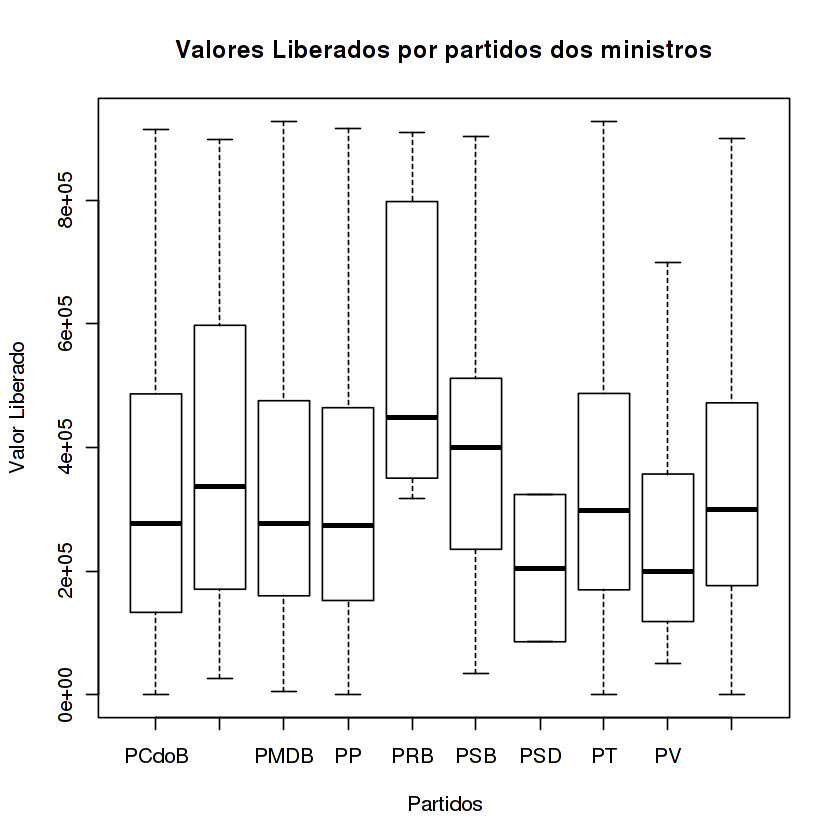

In [3]:
boxplot(Vl_Liberado ~ Partido_Ministro, data=dfan, main="Valores Liberados por partidos dos ministros",
   xlab="Partidos", ylab="Valor Liberado")

#### 3. Aprofundando a análise com o Teste Honesto deSignificância de Tukey (HSD Tukey):

Conceito: 

o teste de Tukey serve para fazer um diagnóstico profundo entre os grupos analisados, fazendo um balanço de comparação entre todas as médias dispostas na ANOVA, separando-as em pares e efetuando testes de hipóteses individuais (para cada par) com o intuito de observar quais possuem difença significativa entre as suas médias.

A partir desse teste, pode-se ir escalonadamente selecionando grupos a serem retirados da ANOVA, a fim de agrupar quais são os que possuem o mesmo padrão de média (sustentando em algum momento a hipótese nula) ou, em caso de estudo de métodos mistos, pode servir como diagnóstico para avaliação de casos emergentes ou dissonantes de padrão. 

In [4]:
TukeyHSD(resan)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Vl_Liberado ~ Partido_Ministro, data = dfan)

$Partido_Ministro
                         diff         lwr        upr     p adj
PDT-PCdoB           73734.456  -52536.785 200005.698 0.7036937
PMDB-PCdoB          11451.223  -65073.457  87975.903 0.9999819
PP-PCdoB             5110.737 -100430.514 110651.988 1.0000000
PRB-PCdoB          236710.146  -14004.503 487424.794 0.0832590
PSB-PCdoB           93156.048  -24730.744 211042.841 0.2676216
PSD-PCdoB         -111116.727 -598678.931 376445.477 0.9993849
PT-PCdoB            30450.243  -38899.468  99799.954 0.9304896
PV-PCdoB           -67172.727 -174555.425  40209.971 0.6129112
sem_partido-PCdoB   29240.729  -48928.271 107409.729 0.9748007
PMDB-PDT           -62283.233 -174788.768  50222.301 0.7647826
PP-PDT             -68623.719 -202565.588  65318.150 0.8375521
PRB-PDT            162975.689 -100954.801 426906.179 0.6309027
PSB-PDT             19

Então, retira-se o PV:

Parsed with column specification:
cols(
  UF = col_character(),
  Municipio = col_character(),
  órgão_Concedente = col_character(),
  Ano_de_Vigencia = col_integer(),
  Nome_Ministro = col_character(),
  Partido_Ministro = col_character(),
  Partido_Governador = col_character(),
  Transferencia_percapita = col_double(),
  Vl_Liberado = col_double()
)


                   Df    Sum Sq   Mean Sq F value Pr(>F)  
Partido_Ministro    8 9.588e+11 1.199e+11   2.343 0.0166 *
Residuals        2929 1.499e+14 5.116e+10                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

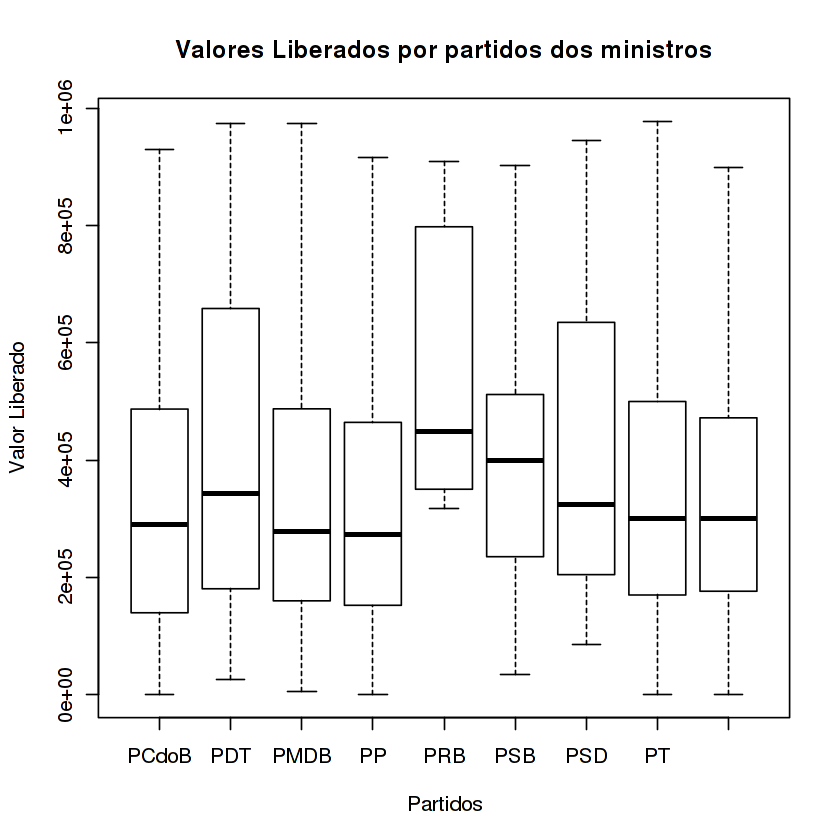

In [17]:
dfan2 <- read_csv("Aula8_analise_part_uf_anova_estabilizada.csv")
resan2 <- aov(Vl_Liberado ~ Partido_Ministro, data = dfan2)
summary(resan2)
boxplot(Vl_Liberado ~ Partido_Ministro, data=dfan2, main="Valores Liberados por partidos dos ministros",
   xlab="Partidos", ylab="Valor Liberado")

...e a ANOVA ainda indica diferença. Apesar de que o teste mais pormenorizado (Tukey) confirma os boxplots:

In [22]:
TukeyHSD(resan2)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Vl_Liberado ~ Partido_Ministro, data = dfan2)

$Partido_Ministro
                          diff        lwr       upr     p adj
PDT-PCdoB           93987.4618  -33490.27 221465.19 0.3492799
PMDB-PCdoB          15778.9910  -62464.81  94022.79 0.9994685
PP-PCdoB             -852.3215 -109154.59 107449.95 1.0000000
PRB-PCdoB          230747.0869  -26949.47 488443.64 0.1218358
PSB-PCdoB           87192.9898  -33825.81 208211.79 0.3820950
PSD-PCdoB          129983.3210 -281246.33 541212.97 0.9876029
PT-PCdoB            33056.8305  -37894.56 104008.23 0.8797223
sem_partido-PCdoB   23277.6702  -56804.13 103359.47 0.9928910
PMDB-PDT           -78208.4709 -191347.36  34930.42 0.4420996
PP-PDT             -94839.7834 -230514.76  40835.19 0.4258560
PRB-PDT            136759.6251 -133584.29 407103.54 0.8210764
PSB-PDT             -6794.4720 -152821.41 139232.46 1.0000000
PSD-PDT             35995.8592 -38

Então, faz-se última remoção no banco de dados (sem o PRB) e finalmente se estabelece o padrão para H0 (no teste F convencional):

Parsed with column specification:
cols(
  UF = col_character(),
  Municipio = col_character(),
  órgão_Concedente = col_character(),
  Ano_de_Vigencia = col_integer(),
  Nome_Ministro = col_character(),
  Partido_Ministro = col_character(),
  Partido_Governador = col_character(),
  Transferencia_percapita = col_double(),
  Vl_Liberado = col_double()
)


                   Df    Sum Sq   Mean Sq F value Pr(>F)  
Partido_Ministro    7 6.367e+11 9.095e+10   1.778 0.0872 .
Residuals        2922 1.494e+14 5.115e+10                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

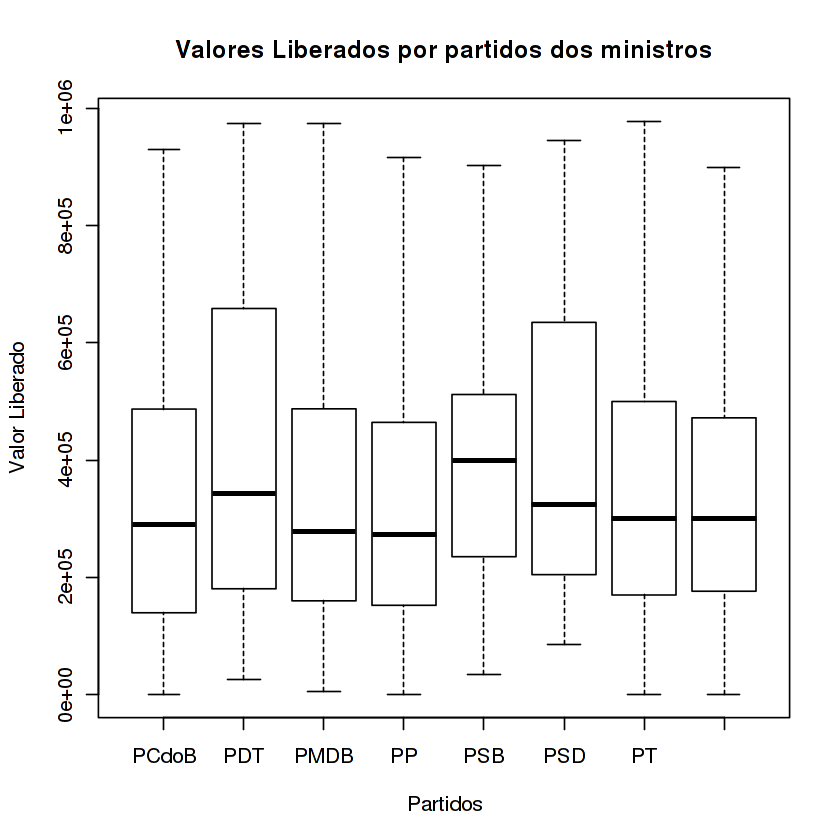

In [24]:
dfan3 <- read_csv("Aula8_analise_part_uf_anova_estabilizada_final.csv")
resan3 <- aov(Vl_Liberado ~ Partido_Ministro, data = dfan3)
summary(resan3)
boxplot(Vl_Liberado ~ Partido_Ministro, data=dfan3, main="Valores Liberados por partidos dos ministros",
   xlab="Partidos", ylab="Valor Liberado")